In [50]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
boston = pd.read_csv("resources/train.csv")

boston.head()

,ID,crime rate,zoned,non-retail,charles river,nitrogen_o2,room per dwelling,age,distance,radial,tax,pupil teacher ratio,black,lower,median
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [52]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   333 non-null    int64  
 1   crime rate           333 non-null    float64
 2   zoned                333 non-null    float64
 3   non-retail           333 non-null    float64
 4   charles river        333 non-null    int64  
 5   nitrogen_o2          333 non-null    float64
 6   room per dwelling    333 non-null    float64
 7   age                  333 non-null    float64
 8   distance             333 non-null    float64
 9   radial               333 non-null    int64  
 10  tax                  333 non-null    int64  
 11  pupil teacher ratio  333 non-null    float64
 12  black                333 non-null    float64
 13  lower                333 non-null    float64
 14  median               333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 3

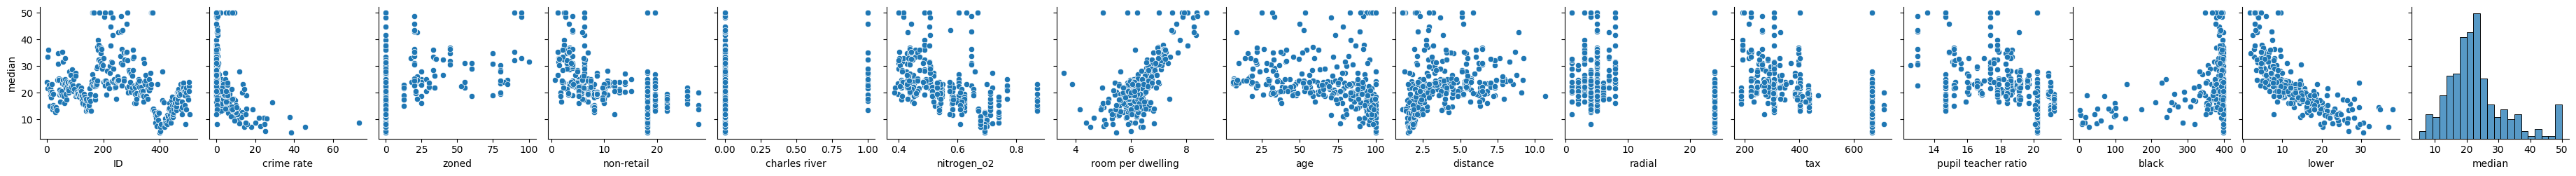

In [53]:
sns.pairplot(boston, y_vars ="median" )

In [54]:
boston.columns

Index(['ID', 'crime rate', 'zoned', 'non-retail', 'charles river',
       'nitrogen_o2', 'room per dwelling', 'age', 'distance', 'radial', 'tax',
       'pupil teacher ratio', 'black', 'lower', 'median'],
      dtype='object')

In [55]:
X = boston[[ 'nitrogen_o2','room per dwelling', 'distance','pupil teacher ratio',  'lower']]
Y = boston['median']

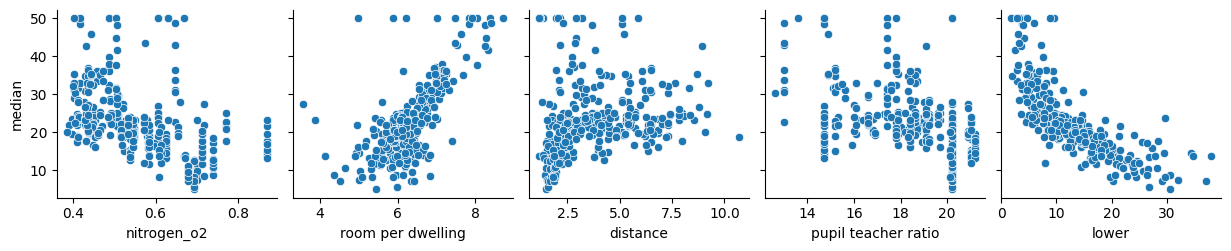

In [56]:
sns.pairplot(boston, y_vars ="median", x_vars = ["nitrogen_o2", "room per dwelling", "distance", "pupil teacher ratio", "lower" ])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 50)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [60]:
model = LinearRegression()


In [61]:
model.fit(x_train,y_train)

LinearRegression()

In [62]:
test = model.predict(x_test)

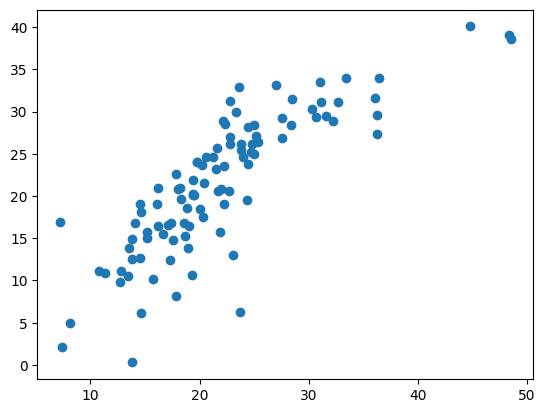

In [63]:
plt.scatter(y_test,test)

In [64]:
from sklearn import metrics
import numpy as np

In [65]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test)))

RMSE: 4.685090132909769


In [66]:
"""Predictions"""

'Predictions'

In [67]:
boston_test = pd.read_csv('resources/test.csv')

In [68]:
boston_test.head()

,ID,crime rate,zoned,non-retail,charles river,nitrogen_o2,room per dwelling,age,distance,radial,tax,pupil teacher ratio,black,lower
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [69]:
boston_test.columns

Index(['ID', 'crime rate', 'zoned', 'non-retail', 'charles river',
       'nitrogen_o2', 'room per dwelling', 'age', 'distance', 'radial', 'tax',
       'pupil teacher ratio', 'black', 'lower'],
      dtype='object')

In [70]:
X_test = boston_test[['nitrogen_o2','room per dwelling', 'distance','pupil teacher ratio',  'lower']]

In [71]:
Predictions = model.predict(X_test)

In [72]:
predict = pd.DataFrame({'ID':boston_test.ID, 'medv' : Predictions})

In [73]:
predict.to_csv("output/predictions.csv", index = False)